#K-Nearest Neighbors (K-NN)


## Importing the libraries

In [102]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from matplotlib import style 
style.use('seaborn-whitegrid')
# plt.rcParams['figure.figsize'] = (16, 7)

##import data by connecting to your google drive


In [103]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Navigate to the file/data location in your drive and cd into it

In [104]:
path = '/content/drive/MyDrive/Colab Notebooks/ML Datasets/Social_Network_Ads.csv'

## Importing the dataset

In [105]:
dataset = pd.read_csv(path) 
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

### Dataset Evaluation

Features

In [106]:
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


Labels

In [107]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [108]:
X = X.values
y = y.values.reshape(-1)
print(np.shape(X))
print(np.shape(y))

(400, 4)
(400,)


## Encoding categorical data

### Encoding the Independent Variable

In [109]:
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:,1])
X

array([[15624510, 1, 19, 19000],
       [15810944, 1, 35, 20000],
       [15668575, 0, 26, 43000],
       ...,
       [15654296, 0, 50, 20000],
       [15755018, 1, 36, 33000],
       [15594041, 0, 49, 36000]], dtype=object)

###Visualizing Features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


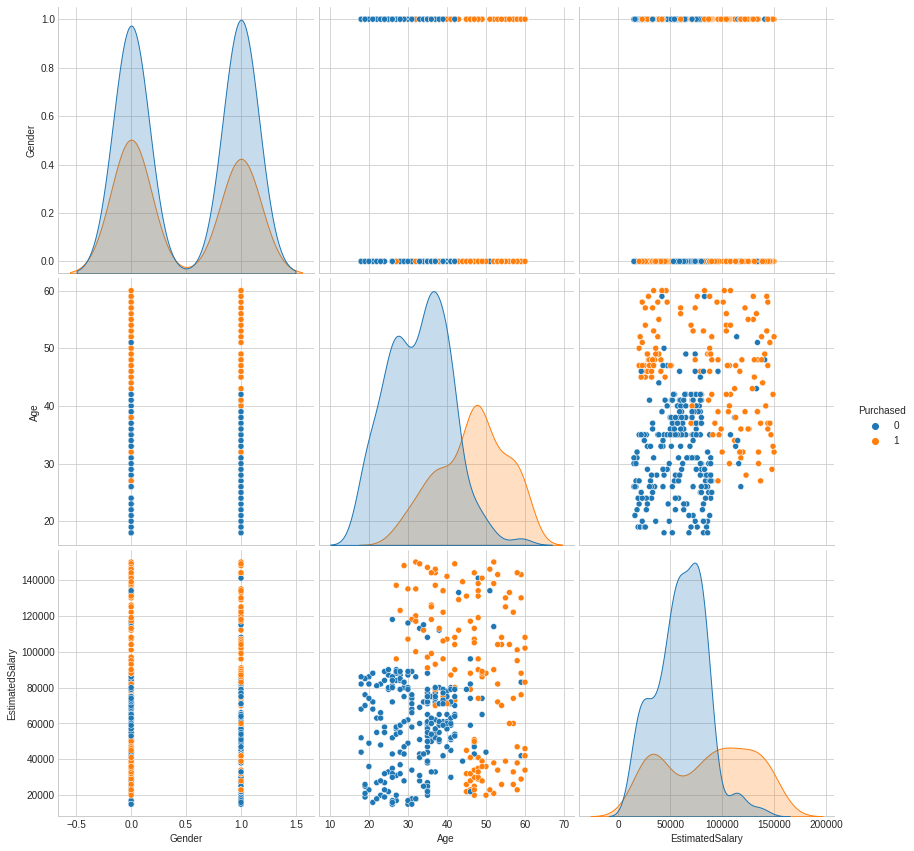

In [110]:
df = np.concatenate((X[:,1:4],y.reshape(-1,1)),1)
df =  pd.DataFrame(df, columns = ["Gender",	"Age", "EstimatedSalary", "Purchased"])
sb.pairplot(df, hue="Purchased", size=4)

## Splitting the dataset into the Training set and Test set

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [112]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting K-NN to the Training set


In [113]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train[:,2:4], y_train)

KNeighborsClassifier()

In [114]:
np.shape(X_train[:,2:4])

(320, 2)

## Predicting the Test set results


In [115]:
y_pred = classifier.predict(X_test[:,2:4])

In [116]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


### Making the Confusion Matrix

In [117]:
cm = confusion_matrix(y_test, y_pred)

###Accuracy Measurement

In [118]:
print(accuracy_score(y_test, y_pred)*100)

95.0


## Calculating error for K values between 1 and 100

In [119]:
error = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

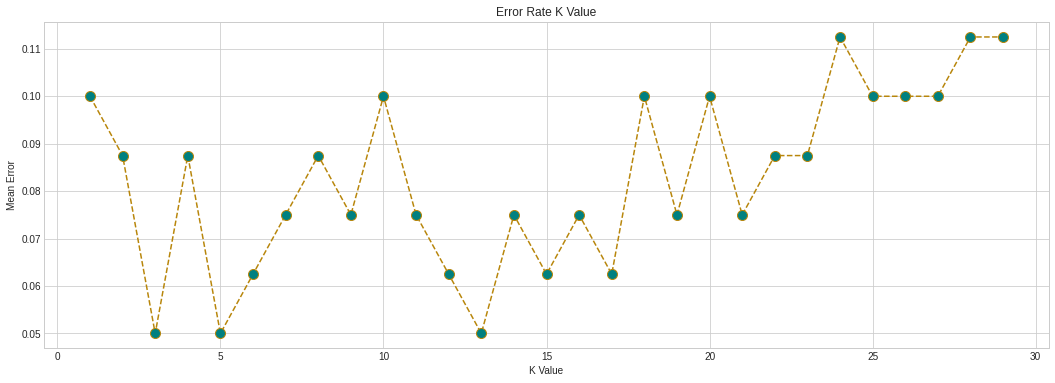

In [120]:
plt.figure(figsize=(18, 6))
plt.plot(range(1, 30), error, color='darkgoldenrod', linestyle='dashed', marker='o',
         markerfacecolor='teal', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Visualising the Training set results


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


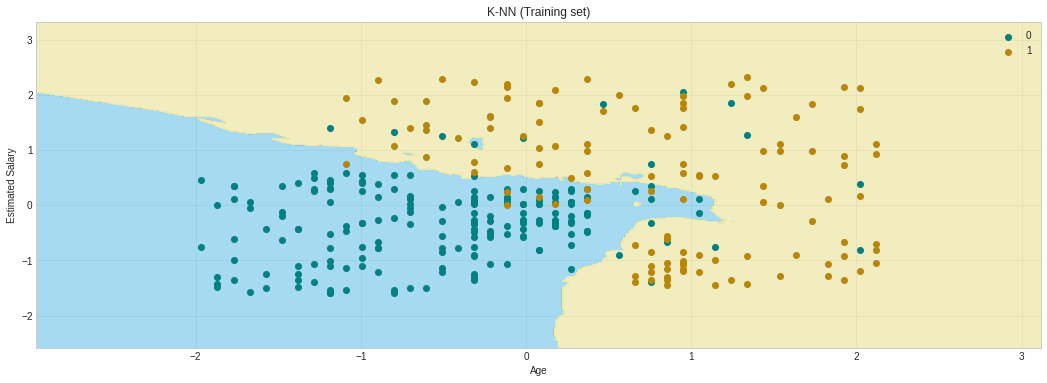

In [121]:
plt.figure(figsize=(18, 6))
X_set, y_set = X_train[:,2:4], y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('skyblue', 'palegoldenrod')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('teal', 'darkgoldenrod'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


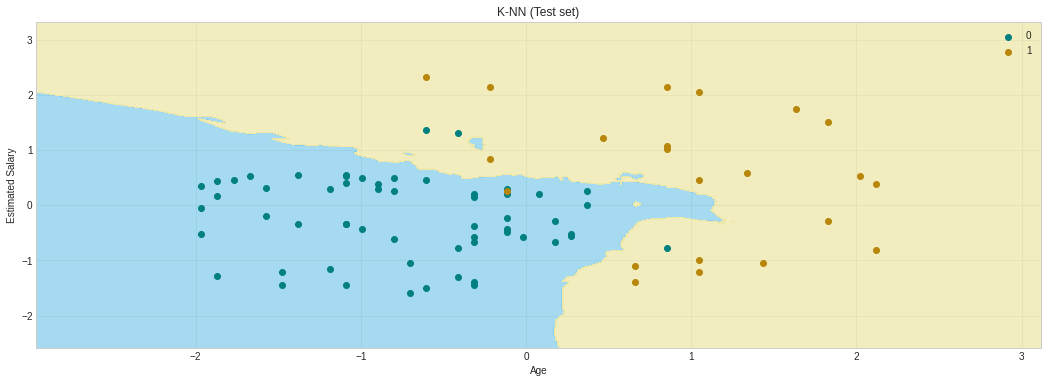

In [122]:
plt.figure(figsize=(18, 6))
X_set, y_set = X_test[:,2:4], y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('skyblue', 'palegoldenrod')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('teal', 'darkgoldenrod'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [123]:
df = np.concatenate((X_train[:,2:4],classifier.predict(X_train[:,2:4]).reshape(-1,1)),1)
df =  pd.DataFrame(df, columns = ["Age","Estimated_Salary","Purchased"])
df

,Age,Estimated_Salary,Purchased
0,1.922950,2.146016,1.0
1,2.020161,0.378719,1.0
2,-1.382215,-0.432499,0.0
3,-1.187794,-1.011940,0.0
4,1.922950,-0.925024,1.0
...,...,...,...
315,0.950843,-1.156800,1.0
316,-0.896162,-0.780164,0.0
317,-0.215686,-0.519415,0.0
318,-1.090583,-0.461471,0.0


##Training Plot using Seaborn

In [127]:
# sb.kdeplot(data = df, x="Estimated_Salary", y="Age", hue="Purchased", multiple="fill")
# sb.FacetGrid(df, size=5,hue="Purchased").map(plt.scatter,"Age","Estimated_Salary").add_legend()
# plt.title('K-NN (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

##Alternate Plots


###function

In [135]:
import warnings
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D

def plot_decision_boundary2D(clf, X: np.ndarray, y: np.ndarray, classes: list, colormap: np.ndarray,
                             step: float = 0.1, prob_dot_scale: int = 40, prob_dot_scale_power: int = 3,
                             true_dot_size: int = 50, pad: float = 1.0,
                             prob_values: list = [0.4, 0.6, 0.8, 1.0]) -> None:
    X_dim = X.shape[1]
    if X_dim < 2:
        raise Exception("Error: Not enough dimensions in input data. Data must be at least 2-dimensional.")
    elif X_dim > 2: 
        warnings.warn(f"Warning: input data was {X_dim} dimensional. Expected 2. Using first 2 dimensions provided.")
    
    if not isinstance(colormap, np.ndarray):
        colormap = np.array(colormap)        
    plt.figure(figsize=(18, 6))
     
    x0 = X[:,0]
    x1 = X[:,1]
    
    x0_min, x0_max = np.round(x0.min())-pad, np.round(x0.max()+pad)
    x1_min, x1_max = np.round(x1.min())-pad, np.round(x1.max()+pad)    
    x0_axis_range = np.arange(x0_min,x0_max, step)
    x1_axis_range = np.arange(x1_min,x1_max, step)
    
    xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)
    
    xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))
    
    yy_hat = clf.predict(xx) 
    yy_prob = clf.predict_proba(xx) 
                                   
    yy_size = np.max(yy_prob, axis=1)
    
    plt.style.use('seaborn-whitegrid') 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=150)
    
    ax.scatter(xx[:,0], xx[:,1], c=colormap[yy_hat], alpha=0.4, s=prob_dot_scale*yy_size**prob_dot_scale_power, linewidths=0,)
    
    ax.contour(x0_axis_range, x1_axis_range, 
               np.reshape(yy_hat,(xx0.shape[0],-1)), 
               levels=3, linewidths=1, 
               colors=[colormap[0],colormap[1], colormap[1], colormap[2],])
 
    ax.scatter(x0, x1, c=colormap[y], s=true_dot_size, zorder=3, linewidths=0.7, edgecolor='k')
 
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
 
    ax.set_ylabel(r"$x_1$")
    ax.set_xlabel(r"$x_0$")
    
    ax.set_aspect(1)
 
    legend_class = []
    for class_id, color in zip(classes, colormap):
        legend_class.append(Line2D([0], [0], marker='o', label=class_id,ls='None',
                                   markerfacecolor=color, markersize=np.sqrt(true_dot_size), 
                                   markeredgecolor='k', markeredgewidth=0.7))
 
    legend1 = ax.legend(handles=legend_class, loc='center', 
                        bbox_to_anchor=(1.05, 0.35),
                        frameon=False, title='class')
    ax.add_artist(legend1) 
 
    ax.set_yticks(np.arange(x1_min,x1_max, 1)) 
    ax.grid(False) 
 
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
 
    ax.set_xticks(ax.get_xticks()[1:-1])
    ax.set_yticks(np.arange(x1_min,x1_max, 1)[1:])
 
    plt.show()


###Visualization

<Figure size 1296x432 with 0 Axes>

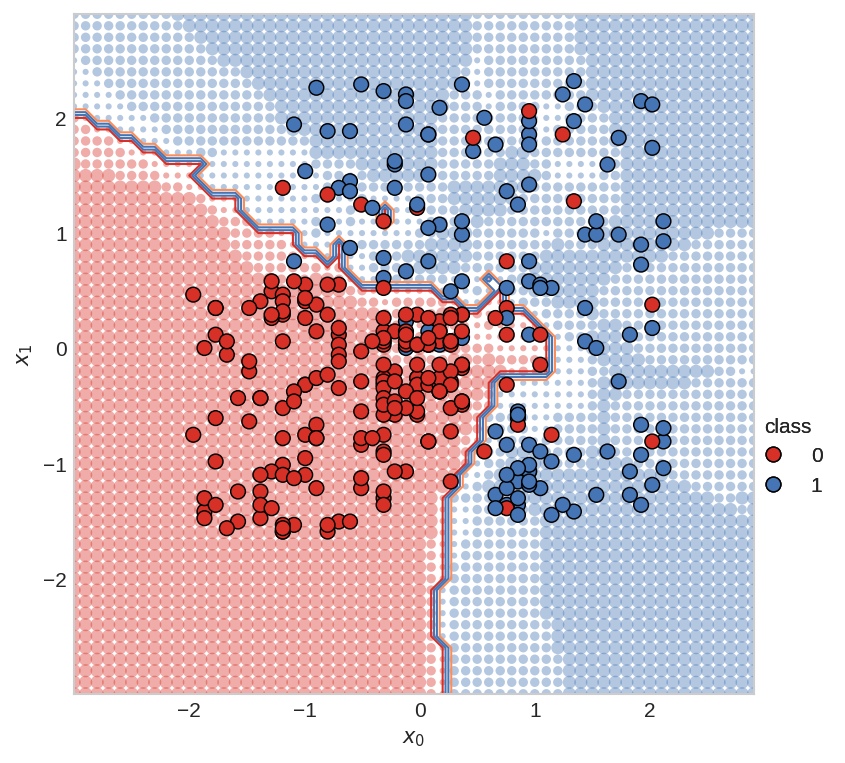

In [137]:
N_NEIGHBORS = 5 
H = 0.1
PROB_DOT_SCALE = 40 
PROB_DOT_SCALE_POWER = 3 
TRUE_DOT_SIZE = 50 
PAD = 1.0 

redish = '#d73027'
orangeish = '#fc8d59'
blueish = '#4575b4'
colormap = np.array([redish,blueish,orangeish])

classes = ['0','1']

x = X_train[:,2:4]
y = y_train
x
clf = KNeighborsClassifier(N_NEIGHBORS, weights='uniform')
clf.fit(x, y)

plot_decision_boundary2D(clf, x, y.copy(), classes, colormap, 
                         step=H, 
                         prob_dot_scale=PROB_DOT_SCALE, 
                         prob_dot_scale_power=PROB_DOT_SCALE_POWER,
                         true_dot_size=TRUE_DOT_SIZE, 
                         pad=PAD,)